In [112]:
# Linear Regression using ANN with PyTorch
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [113]:
# Load the dataset
# data = pd.read_csv('Housing-1.csv')
data = pd.read_csv('/content/Housing-1.csv')

In [114]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [115]:
# Handling categorical features by encoding them to integers
label_encoders = {} # create an empty dic to store the label encoders for each categorical column
# choose columns that need to be mapped
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
# lop through each col in the categorical_columns
for column in categorical_columns:
    # each col create a new instance(start count from zero for each unique value)
    label_encoders[column] = LabelEncoder()
    # replace the mapped value by the new values
    data[column] = label_encoders[column].fit_transform(data[column])

In [116]:
# show the head of the data set
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [117]:
# Features and labels (include all relevant columns)
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']].values
y = data['price'].values

# Split the dataset into training and test sets
# 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# (random_state=42) will make the data split consistent across different runs.


In [118]:
# Normalize the data (StandardScaler from sklearn)
scaler = StandardScaler() # sub the mean and dividing by the standard deviation
# Fit the scaler to the training data and then apply the transformation to standardize the features
# This ensures that the features have a mean of 0 and a standard deviation of 1
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data into PyTorch tensors
# ensures the data type is compatible with PyTorch models
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
# .view(-1, 1) reshapes the tensor to ensure it's a column vector with one value per row
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)
# X_train.shape[1]

In [119]:
class LinearRegressionANN(nn.Module):
    def __init__(self):
        # call the constructor of the parent class (nn.Module)
        super(LinearRegressionANN, self).__init__()
        # X_train.shape[1] number of features (12)
        self.linear1 = nn.Linear(X_train.shape[1], 256)  # Hidden layer with 64 units
        self.relu = nn.ReLU()  # Activation function
        self.linear2 = nn.Linear(256, 64)  # Another hidden layer
        # self.linear3 = nn.Linear(64, 32)  # Another hidden layer
        self.output = nn.Linear(64, 1)  # Output layer
        # as we increase the neurons number or the layers, the performance inc.

    def forward(self, x):
        # take the output of the first hidden layer and apply the ReLU activation function
        x = self.relu(self.linear1(x))
        # take the output of the second hidden layer and apply the ReLU activation function
        x = self.relu(self.linear2(x))
        # x = self.relu(self.linear3(x))
        return self.output(x)


In [120]:
# Instantiate the model
model = LinearRegressionANN()

# Define the loss function and the optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# model.parameters() refers to the learnable parameters (weights and biases) of the model.
# lr refers to the learning rate, which controls the step size during optimization.


In [121]:
# Training loop
epochs = 1000
# loop through each epoch
for epoch in range(epochs):
    # set the model to training mode (important for certain layers like dropout and normalization)
    model.train()

    # Forward pass
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)

    # Backward pass and optimization
    # clear the gradients of model's parameters
    optimizer.zero_grad()
    # calculate the gradients of the loss with respect to the model's parameters
    loss.backward()
    # optimizer adjusts the model's weights based on the gradients to min the loss.
    optimizer.step()

    if (epoch+1) % 100 == 0:  # print every 100 epochs
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')


Epoch 100/1000, Loss: 24424128446464.0000
Epoch 200/1000, Loss: 16264227454976.0000
Epoch 300/1000, Loss: 6064239542272.0000
Epoch 400/1000, Loss: 3259063074816.0000
Epoch 500/1000, Loss: 2120767111168.0000
Epoch 600/1000, Loss: 1620430159872.0000
Epoch 700/1000, Loss: 1337560137728.0000
Epoch 800/1000, Loss: 1164318736384.0000
Epoch 900/1000, Loss: 1056211140608.0000
Epoch 1000/1000, Loss: 987806105600.0000


MSE: 2029643352741.6272, MAE: 1099617.8039, R-squared: 0.5985


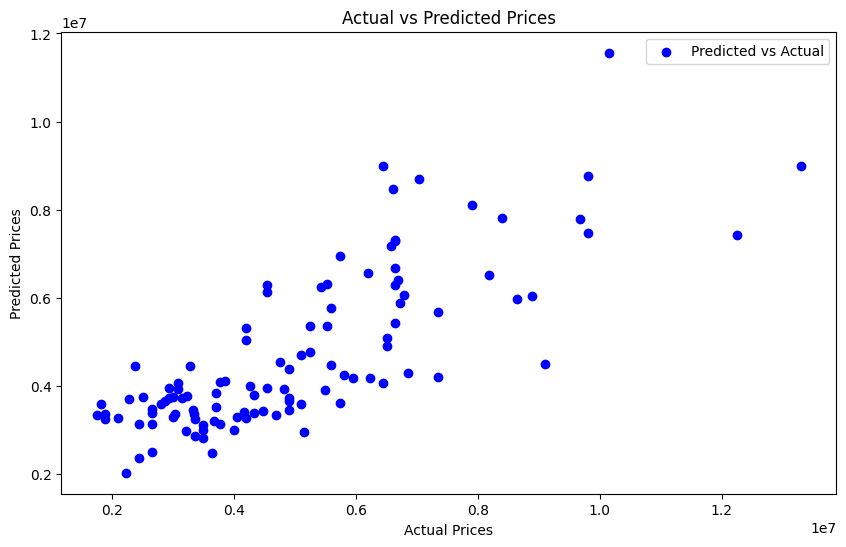

In [122]:
# Evaluation on test set
# disables certain layers like dropout and batch normalization, ensuring the model behaves correctly during evaluation
model.eval()
# perform the forward pass on the test data without updating the gradients
with torch.no_grad():
    # model(X_test_tensor) computes the model's predictions on the test data
    y_pred_test = model(X_test_tensor)
    # convert to numpy array
    y_pred_test = y_pred_test.numpy()

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
# R-squared (R²) measures how well the model's predictions approximate the actual data (closer to 1 is better)
r2 = r2_score(y_test, y_pred_test)

print(f'MSE: {mse:.4f}, MAE: {mae:.4f}, R-squared: {r2:.4f}')

# Visualize the predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', label='Predicted vs Actual')
# plt.plot([0,0], [13000000,13000000], color='red', label='Ideal Prediction', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.title('Actual vs Predicted Prices')
plt.show()